In [1]:
!pip install lazypredict

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UROP/pIC50_dataset.csv')
df

,molecule_chembl_id,canonical_smiles,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,6.096910
...,...,...,...
6151,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,9.679854
6152,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,6.562249
6153,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,4.118045
6154,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,4.259637


In [4]:
descriptors = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UROP/Substructure.csv')
descriptors

,Name,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,...,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,CHEMBL133897,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
1,CHEMBL336398,0,1,1,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
2,CHEMBL131588,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,0,0,0,0,1
3,CHEMBL130628,0,1,0,0,0,0,0,0,1,...,0,0,1,1,1,0,0,0,0,1
4,CHEMBL130478,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,CHEMBL5219841,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
6152,CHEMBL5219046,1,1,0,1,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
6153,CHEMBL5219594,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
6154,CHEMBL5219958,1,0,1,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1


In [5]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [6]:
X = descriptors.drop('Name', axis=1)
Y = df['pIC50']

In [7]:
#remove low variance features
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP18,SubFP23,SubFP26,SubFP32,SubFP49,...,SubFP143,SubFP153,SubFP171,SubFP181,SubFP184,SubFP275,SubFP287,SubFP296,SubFP298,SubFP303
0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,0,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
6152,1,1,0,1,0,0,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0
6153,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
6154,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [9]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
# Defines and builds the lazyregressor
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = reg.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = reg.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:41<00:00,  1.01it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 72
[LightGBM] [Info] Number of data points in the train set: 4924, number of used features: 24
[LightGBM] [Info] Start training from score 5.821106
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:29<00:00,  1.42it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 72
[LightGBM] [Info] Number of data points in the train set: 4924, number of used features: 24
[LightGBM] [Info] Start training from score 5.821106


In [11]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.71,0.72,0.83,10.60
ExtraTreesRegressor,0.71,0.72,0.83,4.26
DecisionTreeRegressor,0.71,0.72,0.83,0.14
ExtraTreeRegressor,0.71,0.72,0.83,0.15
RandomForestRegressor,0.70,0.70,0.85,1.15
BaggingRegressor,0.69,0.69,0.87,0.44
XGBRegressor,0.67,0.67,0.90,0.83
MLPRegressor,0.62,0.62,0.96,7.71
KNeighborsRegressor,0.57,0.58,1.02,0.29


In [12]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.51,0.52,1.10,0.17
RandomForestRegressor,0.50,0.51,1.11,1.06
MLPRegressor,0.50,0.51,1.11,11.01
LGBMRegressor,0.49,0.50,1.12,0.12
BaggingRegressor,0.49,0.50,1.12,0.19
HistGradientBoostingRegressor,0.49,0.50,1.12,0.50
NuSVR,0.47,0.48,1.14,1.54
SVR,0.47,0.48,1.14,1.89
KNeighborsRegressor,0.45,0.46,1.16,0.07


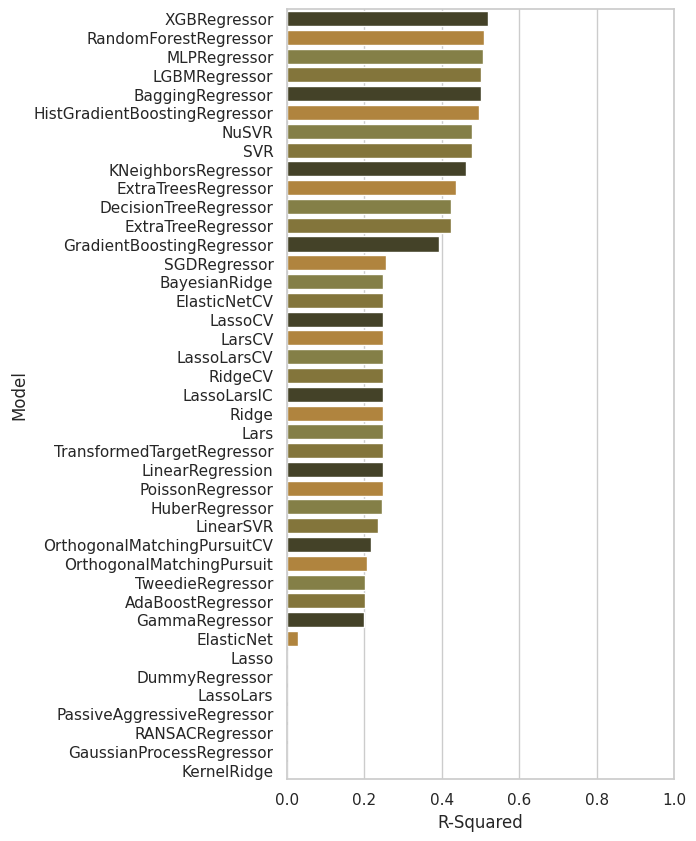

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom colors
custom_colors = ["#494623", "#c3892b", "#8e883d", "#8f7c2f"]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")

# Using the custom color palette in the barplot
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test, palette=custom_colors)
ax.set(xlim=(0, 1))

plt.show()
